In [2]:
!git clone https://github.com/imtheva/DepthAnythingV2_demo

Cloning into 'DepthAnythingV2_demo'...
remote: Enumerating objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89 (from 1)
Receiving objects: 100% (89/89), 133.03 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [1]:
%cd DepthAnythingV2_demo
!pip install -r requirements.txt

/content/DepthAnythingV2_demo


In [2]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
from depth_anything_v2.dpt import DepthAnythingV2



In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
# --- Device setup ---
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'


CUDA available: True


In [4]:
# --- Model configs ---
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vits'  # change to 'vitb', 'vitl', 'vitg' if needed

# --- Load model ---
model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()


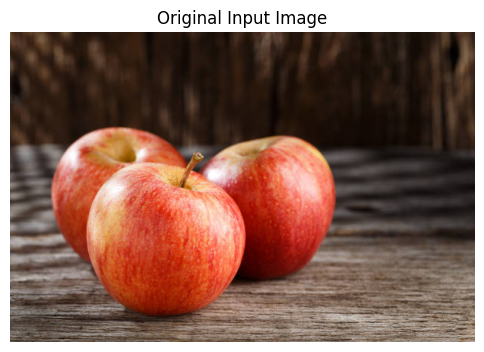

In [13]:

# --- Input image ---
img_path = 'input_images/apple.jpg'  # your input image path
raw_img = cv2.imread(img_path)

plt.figure(figsize=(6, 6))
plt.title("Original Input Image")
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


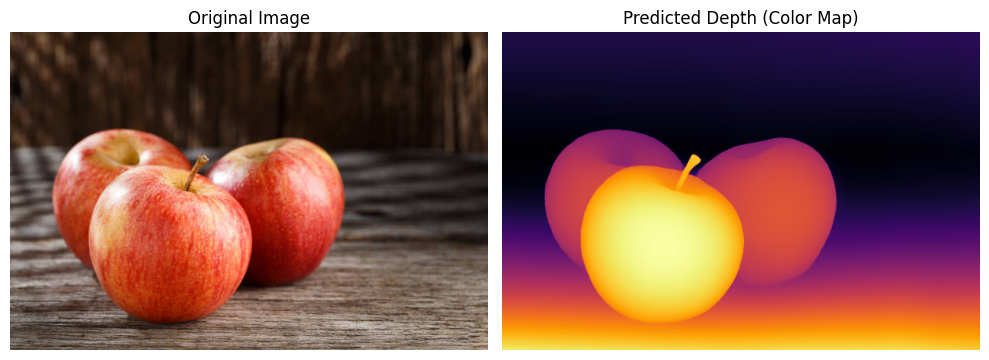

✅ Depth maps saved:
outputs/apple_depth_gray.png
outputs/apple_depth_color.png


In [10]:


# --- Inference ---
depth = model.infer_image(raw_img)

# --- Normalize to 8-bit for saving/display ---
depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())
depth_8bit = (depth_normalized * 255).astype(np.uint8)

# --- Apply color map ---
depth_colormap = cv2.applyColorMap(depth_8bit, cv2.COLORMAP_INFERNO)

# --- Save with same name as input ---
os.makedirs('outputs', exist_ok=True)
base = os.path.splitext(os.path.basename(img_path))[0]
save_path_gray = f'outputs/{base}_depth_gray.png'
save_path_color = f'outputs/{base}_depth_color.png'
cv2.imwrite(save_path_gray, depth_8bit)
cv2.imwrite(save_path_color, depth_colormap)

# --- Display in Colab ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Predicted Depth (Color Map)")
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"✅ Depth maps saved:\n{save_path_gray}\n{save_path_color}")